<h1><center>Aiusha Sangadiev, Homework 1</center></h1>

<h2><center>Task 1: Optimization problem example</center></h2>

We know the formula for surface area of a cylinder $S = 2\pi r^2 + 2\pi rh$. In this task, both dimensions $r$ and $h$ are variable, but we know volume $V$ and formula for the cylinder volume is $V = \pi r^2 h$. Thus, we obtain $h = \frac{V}{\pi r^2}$. Substituing it into surface area formula, we get <br>
<center>$S = 2\pi r^2 + \frac{2V}{r}$.</center><br>
Now, differentiating $S$ with respect to $r$ and equating to zero (necessary optima condition) gives us
<center>$S' = 4\pi r - \frac{2V}{r^2}$ = 0.</center><br>
From where we get value of optimum $r^*$:
<center>$r^* = (\frac{V}{2\pi})^{\frac{1}{3}}.$</center><br>
Sufficient condition for minimum is $S'' > 0$:
<center>$S'' = 4\pi + \frac{8\pi}{r^3} > 0.$</center><br>
Substituting $r^*$ into formula for $h$, we get:
<center>$h^* = 2r.$</center><br>
Thus, $r^* = (\frac{V}{2\pi})^{\frac{1}{3}}$, $h^* = 2r$ and corresponding minimal surface area $S^* = 6\pi (r^*)^2$.

<h2><center>Task 2: Optimality conditions</center></h2>

If a function is strictly convex on an open set, then it has no more than one unique minimum. Thus, we have to determine under which $a$ and $b$, the function $f(x_1, x_2)$ is strictly convex.<br>
On of the ways of showing that the function is strictly convex is to examine its Hessian matrix. For a strictly convex function, Hessian matrix should be positive definite, hence our task is to determine $a$, $b$ that will make Hessian matrix of $f(x_1, x_2)$ positive definite.</br>
First, let us calculate the Jacobian and Hessian matrices:
<center>$J(x_1,x_2) = \begin{pmatrix} 3x_1 + (1+a)x_2 - 1 & 3x_2 + (1+a)x_1 -1 \end{pmatrix}$</center><br>
<center>$H(x_1,x_2) = \begin{pmatrix} 3 & 1+a \\ 1+a & 3 \end{pmatrix}$</center><br>
We can already see that $H(x_1,x_2)$ does not depend on the value of $b$, hence $b \in R$. One of the ways to determine if the matrix is positive definite, is to examine determinants $d_k$ of all of its upper-left submatrices. If all determinants are positive, then the matrix is positive definite:
<center>$d_1 = 3 > 0, d_2 = 9 - (1+a)^2$.</center>
Resolving $9 - (1+a)^2 > 0$ yields $a \in (-4,2)$. Thus, under $a \in (-4,2)$ and $b \in R$ Hessian matrix $H(x_1,x_2)$ will be positive definite, then the function $f(x_1,x_2)$ is strictly convex and has a unique optimal solution.

<h2><center>Task 3: Nelder-Mead method</center></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mishra_bird(x, counter=[0]):
    counter[0] += 1
    return np.sin(x[1])*np.exp((1-np.cos(x[0]))**2) + np.cos(x[0])*np.exp((1-np.sin(x[1]))**2) + (x[0]-x[1])**2

In [3]:
def nelder_mead(func, points, n, h=0.25, eps=1e-3, alpha=1.0, gamma=2.0, beta=0.5, sigma=0.5):
    # if number of points is lower than the needed number, then generate simplex based on the first entry point x0
    if points.shape[0] != n:
        x_0 = points[0]
        points = np.empty((n,n-1))
        points[0] = x_0
        e = np.zeros(n-1) # template for unit vector
        for i in np.arange(1, n):
            e[i-1] = 1
            points[i] = points[0] + h * e
            e[i-1] = 0
    
    x = points.astype(np.float32)
    n = points.shape[0]
    f = np.array([func(x_i) for x_i in x])
    
    # Simplex points
    b, g, w = np.empty((0,2)), np.empty((0,2)), np.empty((0,2))
    
    # Check if shrink was performed at the last iteration
    shrank = False
    
    # Start counting number of function calls 
    # previous n are omitted, because you can evaluate them outside of the method itself
    counter = np.zeros(1)
    
    while(1):
        # Check convergence
        if np.linalg.norm(x[n-1] - x[0]) < eps:
            break;
        
        # 1. Sort
        if (shrank):
            f = np.array([func(x_i, counter) for x_i in x])
            shrank = False
        else:
            f[n-1] = func(x[n-1],counter)
        order = np.argsort(f) 
        x = x[order]
        f = f[order]
        
        x_prev = x
        
        # Save current simplex
        b, g, w = np.append(b, [x[0]], axis=0), np.append(g, [x[n-2]], axis=0), np.append(w, [x[n-1]], axis=0)
        
        # 2. Center of gravity
        x_c = np.sum(x[:n-1], axis=0) / (n-1)

        # 3. Reflection
        x_r = x_c + alpha * (x_c - x[n-1])
        f_r = func(x_r, counter)

        # 4. Expansion
        if f_r < f[n-1]:
            x_e = x_c + gamma * (x_r - x_c)
            if func(x_e, counter) < f_r:
                x[n-1] = x_e
            else:
                x[n-1] = x_r
            continue
        
        if f[0] < f_r < f[n-2]:
            x[n-1] = x_r
            continue
        
        # 5. Contraction
        if f[n-1] > f_r > f[n-2] or f_r > f[n-1]:
            if f[n-1] < f_r > f[n-2]:
                x[n-1] = x_r
            x_s = x_c + beta * (x[n-1] - x_c)
            if func(x_s, counter) < f[n-1]:
                x[n-1] = x_s
                continue
            
        # 6. Shrinkage
        for i in np.arange(1, n):
            x[i] = x[0] + sigma * (x[i] - x[0])
        shrank = True
    return x, b, g, w, counter, points

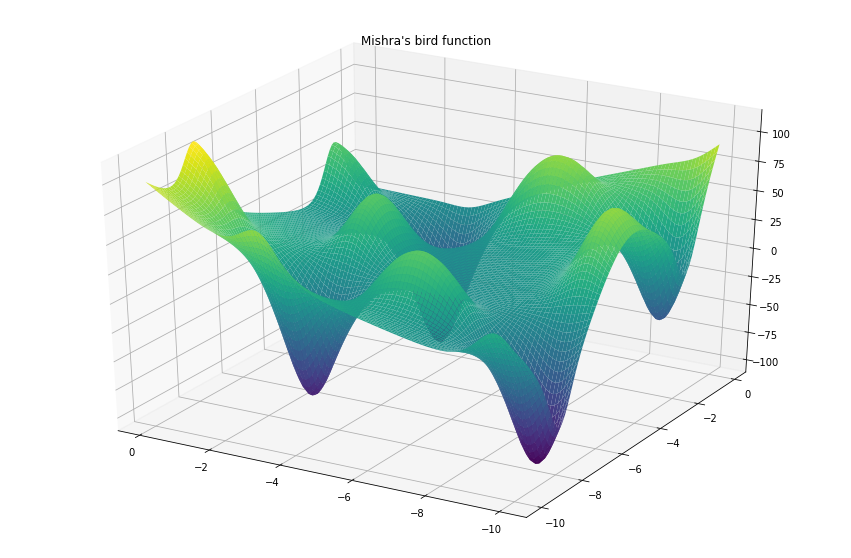

In [4]:
from mpl_toolkits import mplot3d

# Mishra's Bird function plot
X, Y = np.arange(-10, 0, 0.1), np.arange(-10, 0, 0.1)
X, Y = np.meshgrid(X, Y)
Z = mishra_bird([X, Y])

fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Mishra\'s bird function')

plt.gca().invert_xaxis()

plt.show()

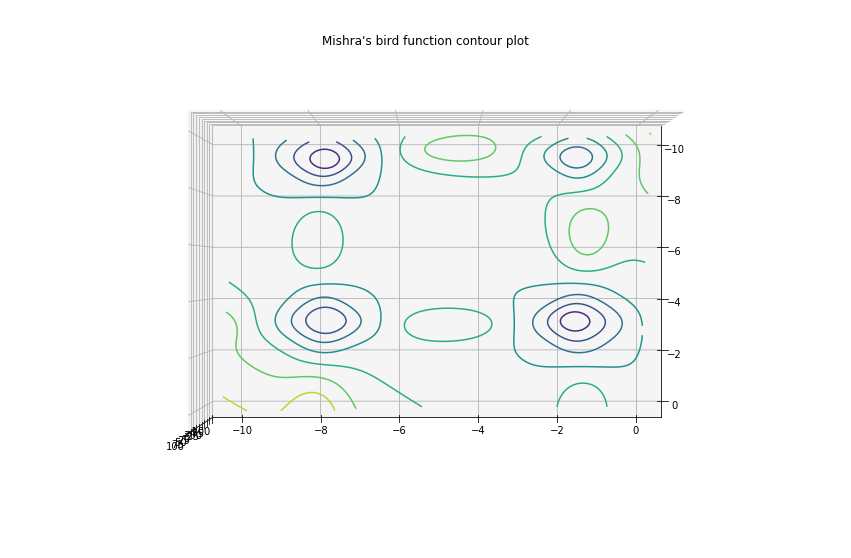

In [5]:
# Contour plot for Mishra's Bird function
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

ax.view_init(90, 0)

X = np.arange(-10, 0, 0.1)
Y = np.arange(-10, 0, 0.1)
X, Y = np.meshgrid(X, Y)
Z = mishra_bird(np.array([X,Y]))

ax.contour(X, Y, Z, cmap = 'viridis')
ax.set_title('Mishra\'s bird function contour plot')

plt.show()

In [6]:
def contour_plot(b, g, w, xscale, yscale):
    fig = plt.figure(figsize=[15, 10])
    ax = fig.gca(projection='3d')

    ax.view_init(90, 0)

    X = np.arange(-15, 0, 0.1)
    Y = np.arange(-10, 0, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = mishra_bird(np.array([X,Y]))

    ax.contour(X, Y, Z, cmap = 'viridis')

    x_t, y_t = np.zeros(b.shape[0], dtype = object), np.zeros(b.shape[0], dtype = object)
    for i in range(b.shape[0]):
        x_t[i] = np.array([b[i][0], g[i][0], w[i][0], b[i][0]])
        y_t[i] = np.array([b[i][1], g[i][1], w[i][1], b[i][1]])
        ax.plot(x_t[i], y_t[i])

    ax.set_xlim(xscale[0], xscale[1])
    ax.set_ylim(yscale[0], yscale[1])
    plt.show()

Starting point $x_0$ = $[(-2,-2.5)]$, two additional generated points to form initial simplex: $(-1.75,-2.5), (-2., -2.25)$ with default step $h = 0.25$, corresponding optimum $x^*$ = $(-3.13, -1.58)$.

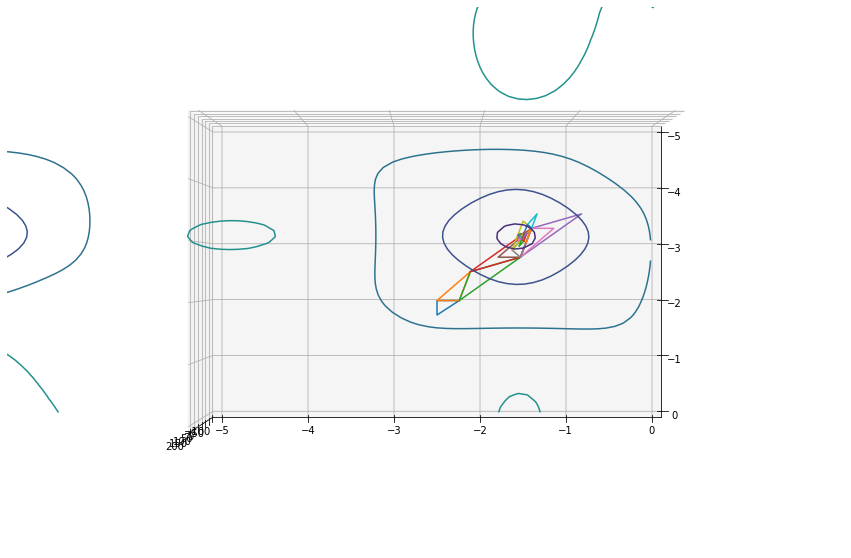

array([[-3.1301353, -1.5820498],
       [-3.130086 , -1.5820657],
       [-3.1300883, -1.5819896]], dtype=float32)

In [7]:
# Nelder Mead iteration visualization
x_0 = np.array([[-2.,-2.5]])
x, b, g, w, counter, points = nelder_mead(mishra_bird, x_0, n=3, eps=1e-4)
contour_plot(b, g, w, [-5, 0], [-5, 0])
x

Starting point $x_0$ = $(-2,-8)$, two additional generated points to form initial simplex: $(-1.75, -8), (-2, -7.75)$ with default step $h = 0.25$, corresponding optimum $x^*$ = $(-3.17, -7.82)$.<br>
Thus, by choosing different $x_0$ we were able to converge to a different optimum.

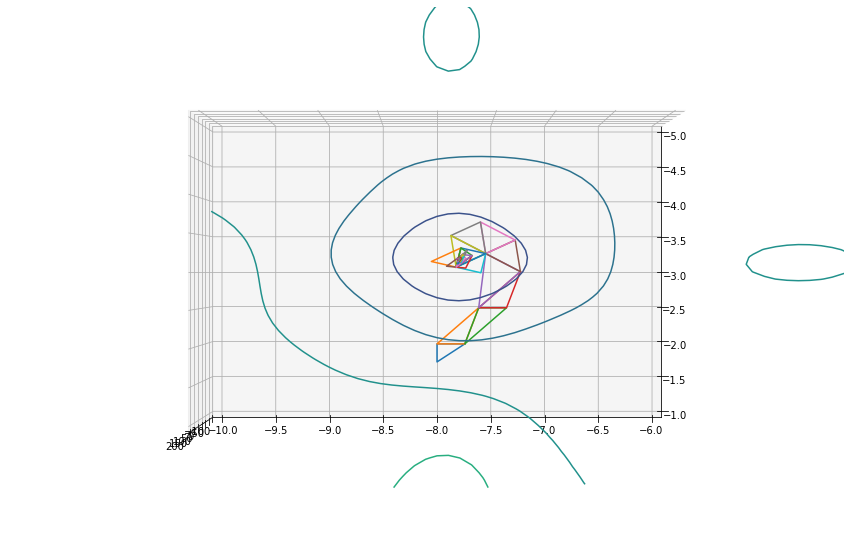

array([[-2.  , -8.  ],
       [-1.75, -8.  ],
       [-2.  , -7.75]])

In [8]:
x_0 = np.array([[-2., -8.]])
x, b, g, w, counter, x_0 = nelder_mead(mishra_bird, x_0, n=3, eps=1e-4)
contour_plot(b, g, w, [-5, -1], [-10, -6])
x_0

1) For $x_0$ = $(-2,-2.5)$, we got $x^*$ = $(-3.13, -1.58)$ with $\alpha = 1$, $\gamma = 2$ and $\beta = 0.5$;<br>
2) If we change parameters to $\alpha = 0.1$, $\gamma = 3$ and $\beta = 0.2$, then method will converge to $x^*$ = $(-2.05, -2.22)$, which means that choice of parameters affects the perfomance of the method.

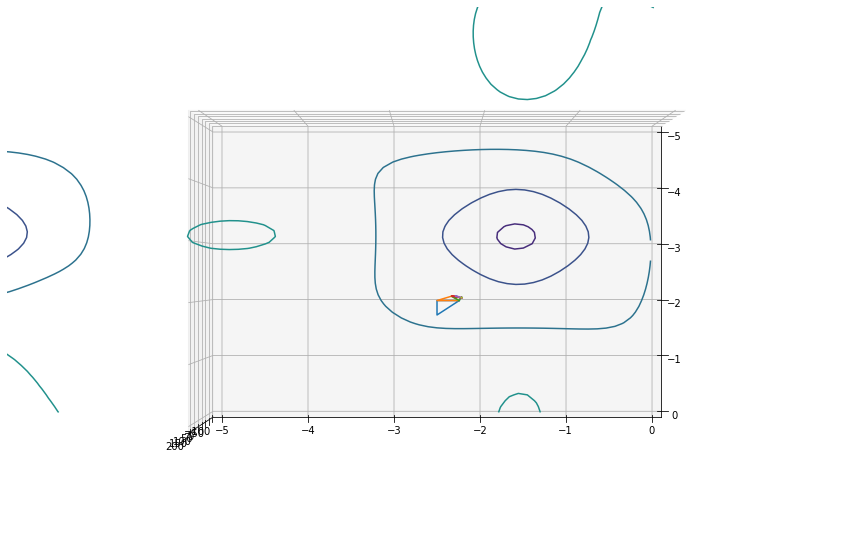

array([[-2.0496006, -2.2197852],
       [-2.0495334, -2.2196975],
       [-2.0495892, -2.21977  ]], dtype=float32)

In [9]:
x_0 = np.array([[-2.,-2.5]])
x, b, g, w, counter, x_0 = nelder_mead(mishra_bird, x_0, n=3, eps=1e-4, alpha=0.1, gamma=3.0, beta=0.2)
contour_plot(b, g, w, [-5, 0], [-5, 0])
x

<h2><center>Task 4: Coordinate descent</center></h2>

In [10]:
import sympy as sp

def coordinate_descent(f, x, x_0, eps=1e-6):
    error = 1
    
    dct = {x[i] : x_0[i] for i in np.arange(x.shape[0])}
    f_prev = f.evalf(subs=dct)
    
    x_plot = np.empty((0, x_0.size))
    
    # iteration counter
    k = 0
    
    while error > eps:
        # calculate alpha
        laplace = sp.Matrix([sp.diff(sp.diff(f, x_i), x_i) for x_i in x]).evalf(subs=dct)
        arg_max = np.argmax(abs(laplace))
        L = abs(laplace[arg_max])
        alpha = 1. / L
        
        # find i_k = argmax |grad_i f|
        J = f.jacobian(x).evalf(subs=dct)
        i_max = np.argmax(abs(J))
        
        # coordinate vector
        e = np.zeros(x_0.size)
        e[i_max] = 1
        
        x_0 = x_0 - alpha * J[i_max] * e
        x_plot = np.append(x_plot, [x_0], axis=0)
        
        # update dictionary and evaluate error
        dct[x[i_max]] = x_0[i_max]
        f_current = f.evalf(subs=dct)
        error = abs(f_current - f_prev)[0]
        f_prev = f_current
        
        # update counter
        k += 1
        
    print(k)
    return x_0, x_plot

7


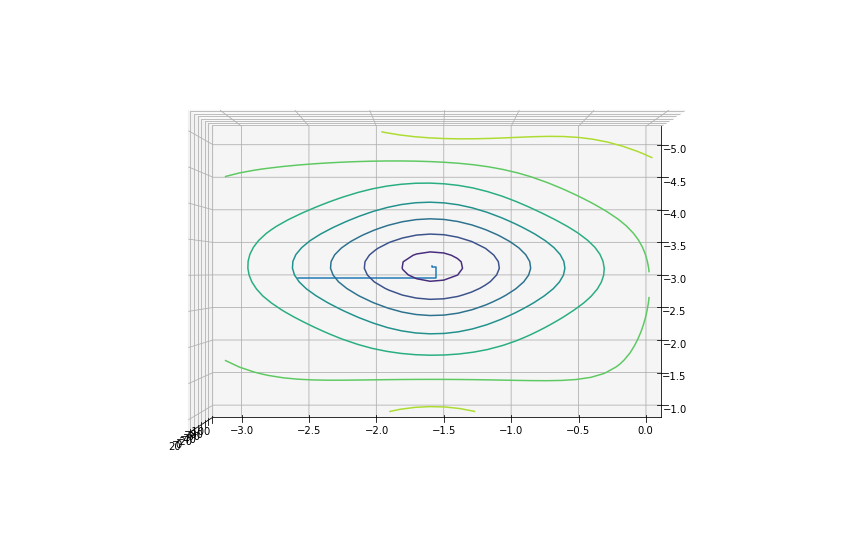

In [11]:
x = sp.symarray('x', 2)
f = sp.Matrix(
    [sp.sin(x[1])*sp.exp((1-sp.cos(x[0]))**2) + sp.cos(x[0])*sp.exp((1-sp.sin(x[1]))**2) + (x[0]-x[1])**2])
x_0 = np.array([-2., -2.5])

x, x_plot = coordinate_descent(f, x, x_0)

# Plot
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

ax.view_init(90, 0)

X = np.arange(-5, -1, 0.1)
Y = np.arange(-3, 0, 0.1)
X, Y = np.meshgrid(X, Y)
Z = mishra_bird(np.array([X,Y]))

ax.contour(X, Y, Z, cmap = 'viridis')
ax.plot(x_plot[:,0], x_plot[:,1])

plt.show()

For coordinate descent we get $6$ function evaluations per iteration (2 - evaluating $\nabla_{ii}^2 f$ to determine step $\alpha = \frac{1}{L}$ (since $|\nabla_{ii}^2 f| \leq L$ for all $i$), 2 - evaluating $\nabla_i f$, 2 - evaluating $f$ with new $x$). Coordinate descent converges in 7 iterations, giving a total of $N_{cd} = 42$ function evaluations, but it has almost twice as many of Oracle calls per iteration compared to Nelder-Mead.

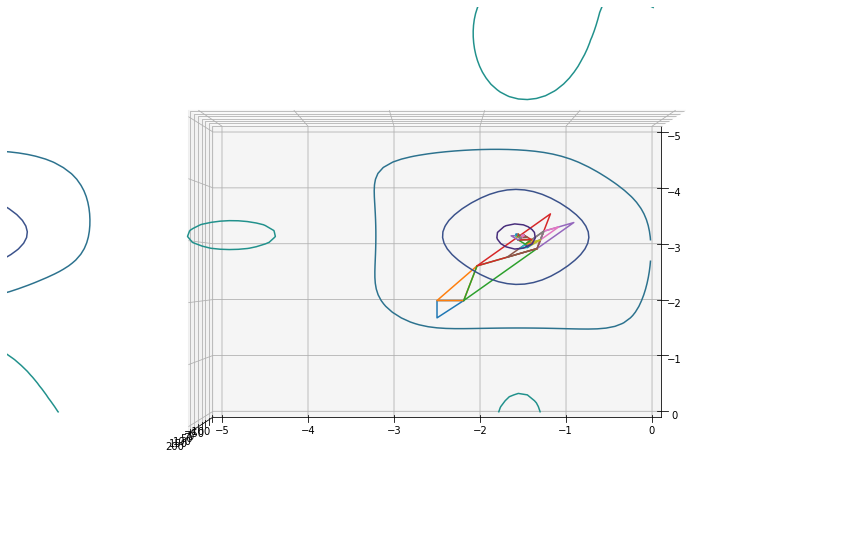

array([148.])

In [12]:
# Nelder Mead with default parameters alpha = 1, gamma = 2, beta = 0.5
x_0 = np.array([[-2.,-2.5]])
x, b, g, w, counter, x_0 = nelder_mead(mishra_bird, x_0, n=3, h=0.3, eps=1e-4)
contour_plot(b, g, w, [-5, 0], [-5, 0])
counter

Number of function evaluations for Nelder Mead depends on the generation of an initial simplex. We can adjust it by varying step size $h$. Under default $h = 0.25$, we get a total of $N_{nm} = 205$ evaluations and $n = 61$ iterations. With $h = 0.3$, $N_{nm} = 148$ and $n = 44$ iterations.<br>
It should be noted that despite the changes in $N_{nm}$ depending on $h$, number of function evaluations in both cases is close to 3.36 per iteration. Thus, Nelder Mead requires almost twice as less function evaluations per iteration compared to the coordinate descent method.

<center><h3>Conclusion</h3></center>
<b>Nelder Mead algorithm:</b><br>
<b>Pros:</b> requires almost twice as less function evaluations per iteration, which may be important if a function is costly to evaluate. Another important plus of this algorithm is that it does not require computations of function derivatives.<br>
<b>Cons:</b> depending on the initial point, it converges slower than coordinate descent. Method also has no means to avoid being stuck in the local optima and has a heavy dependence on the input parameters.

In [13]:
# INFINITE LOOP, DOES NOT CONVERGE
x = sp.symarray('x', 2)
f = sp.Matrix(
    [sp.sin(x[1])*sp.exp((1-sp.cos(x[0]))**2) + sp.cos(x[0])*sp.exp((1-sp.sin(x[1]))**2) + (x[0]-x[1])**2])
x_0 = np.array([-2., -2.])

x, x_plot = coordinate_descent(f, x, x_0)
x

KeyboardInterrupt: 

<b>Coordinate descent algorithm:</b><br>
<b>Pros:</b> when a good initial approximation $x_0$ is available, it converges faster than Nelder Mead and has an easier implementation.<br>
<b>Cons:</b> when a good approximation is unavailable, with $\alpha = \frac{1}{L}$ method does not converge as seen in the code block above. However, with hand tuned $\alpha$ (set to be lower than $\frac{1}{L}$), it does converge, but requires more iterations. Two other cons are derivative evaluations and more function evaluations per step.